# Sentence Contradiction Classification


**Goal:**

**Classify pairs of sentences as "contradiction," "entailment," or "neutral" based on their meaning. The task requires building a model that can understand semantic relationships between text pairs.**


**Dataset Information:**

**Data Files:**

**train.csv (Labeled Training Data)**

**o id: Unique identifier for each sentence pair.**

**o sentence1: The first sentence in the pair (Premise).**

**o sentence2: The second sentence in the pair (Hypothesis).**

**o label: The relationship between the two sentences:**
   

    ▪ 0 = Contradiction (Sentences have opposite meanings)
  
    ▪ 1 = Neutral (Sentences are related but do not imply each other)
    ▪ 2 = Entailment (One sentence logically follows from the other)



# Exploratory Data Analysis (EDA) 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**The Dataset is containing 12000 of sentence with a variety of language from different**

**part of the world As you can see below -**

In [2]:
# Reading Dataset
trained_dataset = pd.read_csv('/kaggle/input/dataset02/train.csv')
trained_dataset.head(10)

,id,premise,hypothesis,lang_abv,language,label
0,5130fd2cb5,and these comments were considered in formulat...,The rules developed in the interim were put to...,en,English,0
1,5b72532a0b,These are issues that we wrestle with in pract...,Practice groups are not permitted to work on t...,en,English,2
2,3931fbe82a,Des petites choses comme celles-là font une di...,J'essayais d'accomplir quelque chose.,fr,French,0
3,5622f0c60b,you know they can't really defend themselves l...,They can't defend themselves because of their ...,en,English,0
4,86aaa48b45,ในการเล่นบทบาทสมมุติก็เช่นกัน โอกาสที่จะได้แสด...,เด็กสามารถเห็นได้ว่าชาติพันธุ์แตกต่างกันอย่างไร,th,Thai,1
5,ed7d6a1e62,"Bir çiftlikte birisinin, ağıla kapatılmış bu ö...",Çiftlikte insanlar farklı terimler kullanırlar.,tr,Turkish,0
6,5a0f4908a0,ریاست ہائے متحدہ امریکہ واپس آنے پر، ہج ایف بی...,ہیگ کی تفتیش ایف بی آئی اہلکاروں کی طرف سے کی...,ur,Urdu,0
7,fdcd1bd867,From Cockpit Country to St. Ann's Bay,From St. Ann's Bay to Cockpit Country.,en,English,2
8,7cfb3d272c,"Look, it's your skin, but you're going to be i...",The boss will fire you if he sees you slacking...,en,English,1
9,8c10229663,Через каждые сто градусов пятна краски меняют ...,Краска изменяется в соответствии с цветом.,ru,Russian,0


In [3]:
# Displaying unique labels with their names

label_mapping = {0: "Contradiction", 1: "Neutral", 2: "Entailment"}
unique_labels = trained_dataset['label'].unique()

print("Unique Labels and Their Meaning:")
for label in unique_labels:
    print(f"{label}: {label_mapping.get(label, 'Unknown')}")

Unique Labels and Their Meaning:
0: Contradiction
2: Entailment
1: Neutral


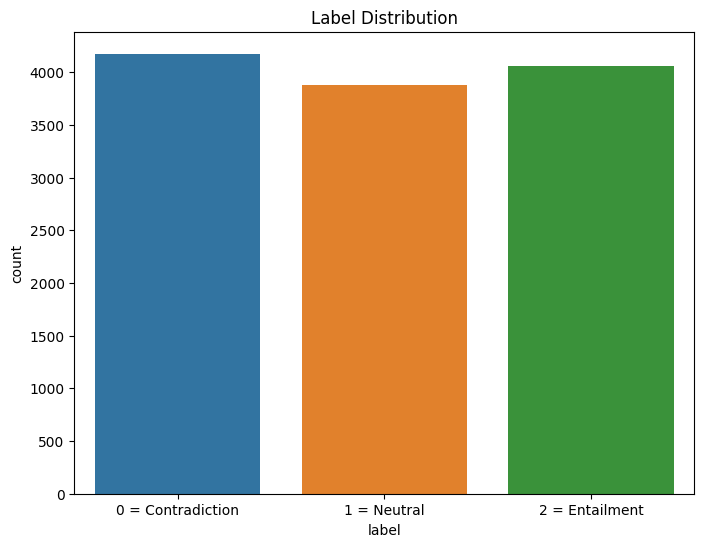

In [4]:
plt.figure(figsize=(8, 6))
sns.countplot(x='label', data=trained_dataset)
plt.title('Label Distribution')
plt.xticks(ticks=[0, 1, 2], labels=['0 = Contradiction', '1 = Neutral', '2 = Entailment'])
plt.show()

In [5]:
print(trained_dataset.columns)

Index(['id', 'premise', 'hypothesis', 'lang_abv', 'language', 'label'], dtype='object')


In [6]:
# Dropping the column named id

trained_dataset.drop(columns=['id'], inplace=True)

In [7]:
# Dropping the all the nan values from the required columns

trained_dataset = trained_dataset.dropna(subset=['premise', 'hypothesis'])

In [8]:
# Analyzing the each catagories sentence length according to the dataset

trained_dataset['premise_length'] = trained_dataset['premise'].apply(lambda x: len(x.split()))
trained_dataset['hypothesis_length'] = trained_dataset['hypothesis'].apply(lambda x: len(x.split()))

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


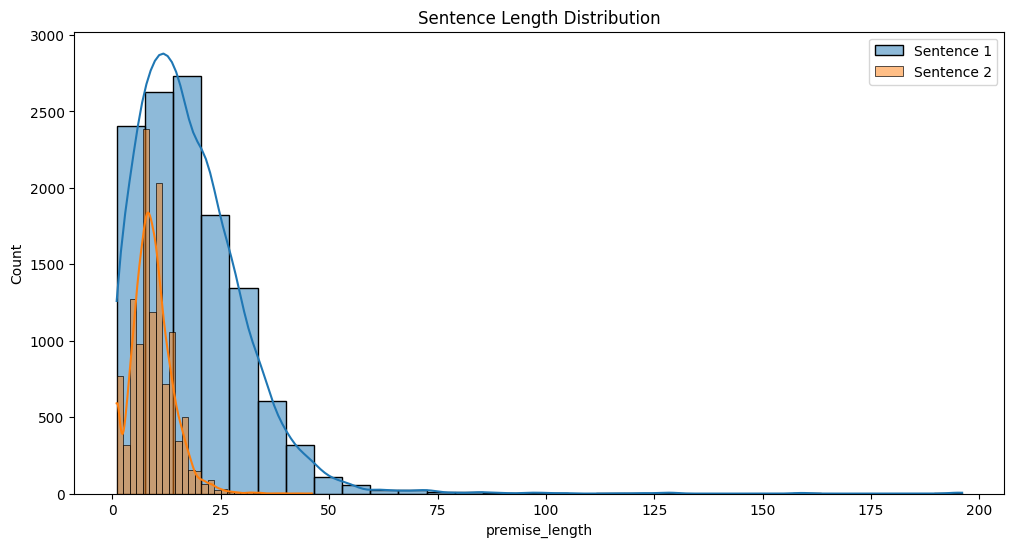

In [9]:
# Plotting a figure for sentence Length distribution

plt.figure(figsize=(12, 6))
sns.histplot(trained_dataset['premise_length'], bins=30, kde=True, label='Sentence 1')
sns.histplot(trained_dataset['hypothesis_length'], bins=30, kde=True, label='Sentence 2')
plt.title('Sentence Length Distribution')
plt.legend()
plt.show()

In [10]:
# Shuffling the dataset to ensure randomness

trained_dataset = trained_dataset.sample(frac=1, random_state=42).reset_index(drop=True)

# Dropping the 50% of the data for easy model train

trained_dataset = trained_dataset.iloc[:len(trained_dataset) // 2]

# Verifying the new dataset size

print(f"New dataset size after dropping half the data: {trained_dataset.shape[0]} rows") 

New dataset size after dropping half the data: 6060 rows


In [11]:
# New features added to the column list

trained_dataset.head(10)

,premise,hypothesis,lang_abv,language,label,premise_length,hypothesis_length
0,Кто? Она спросила его с неожиданным интересом.,"Она спросила, как это сделать, так как с её то...",ru,Russian,1,7,14
1,Others are Zao (in Tohoku) and a number of res...,There are a lot of resorts in the national park.,en,English,0,34,10
2,trying to keep grass alive during a summer on ...,There was no cost in keeping the grass alive i...,en,English,2,17,13
3,so i guess my experience is is just with what ...,They were able to be home rather than having t...,en,English,0,31,15
4,The Journal put the point succinctly to Is an...,"The Journal asked ""Is this a good political mo...",en,English,1,12,9
5,"Tuy nhiên, email của nhà phân tích phản ánh rằ...",Nhà phân tích đã không rõ ràng về nhiều thứ.,vi,Vietnamese,0,56,10
6,"Ω, παρακαλώ. Υπήρξε πραγματική ανησυχία στη φω...",Η φωνή της έδειξε την ανησυχία της.,el,Greek,0,8,7
7,yeah okay yeah those games are fun to watch yo...,Those games are a lot of fun.,en,English,0,15,7
8,ในฐานะสมาชิกของอินเนอร์เซอร์เคิลคุณจะได้รับสิท...,สมาชิกวงใน ไม่ได้รับอะไรเลย ในฐานะที่เป็นสมาชิ...,th,Thai,2,4,3
9,Another White House murder mystery and a chanc...,White House murder mystery has other works bef...,en,English,0,12,10


In [12]:
# checking for missing values 

print(trained_dataset.isnull().sum())

premise              0
hypothesis           0
lang_abv             0
language             0
label                0
premise_length       0
hypothesis_length    0
dtype: int64


In [13]:
# Dropping Null values
trained_dataset = trained_dataset.dropna().reset_index(drop=True)


In [14]:
trained_dataset.shape[0]

6060

In [15]:
# Dropping duplicate values if any

trained_dataset = trained_dataset.drop_duplicates().copy()
trained_dataset.shape


(6060, 7)

In [16]:
# Statistical Summary of The present dataset

print(trained_dataset.describe())

             label  premise_length  hypothesis_length
count  6060.000000     6060.000000        6060.000000
mean      0.984653       18.127228           9.237459
std       0.821559       13.475944           4.693745
min       0.000000        1.000000           1.000000
25%       0.000000        9.000000           6.000000
50%       1.000000       16.000000           9.000000
75%       2.000000       25.000000          12.000000
max       2.000000      196.000000          42.000000


In [17]:
# showing the percentage of the leabled column

label_counts = trained_dataset['label'].value_counts()
label_counts_percent = trained_dataset['label'].value_counts(normalize=True) * 100


label_summary = pd.DataFrame({'Count': label_counts, 'Percentage': label_counts_percent.round(2)})
print(label_summary)


       Count  Percentage
label                   
0       2092       34.52
2       1999       32.99
1       1969       32.49


In [18]:
# Showing the language distribution

print(trained_dataset['language'].value_counts())

language
English       3417
Chinese        219
Vietnamese     213
Swahili        207
French         202
Russian        193
Arabic         190
Greek          187
Thai           187
Urdu           187
Hindi          184
German         176
Bulgarian      174
Spanish        172
Turkish        152
Name: count, dtype: int64


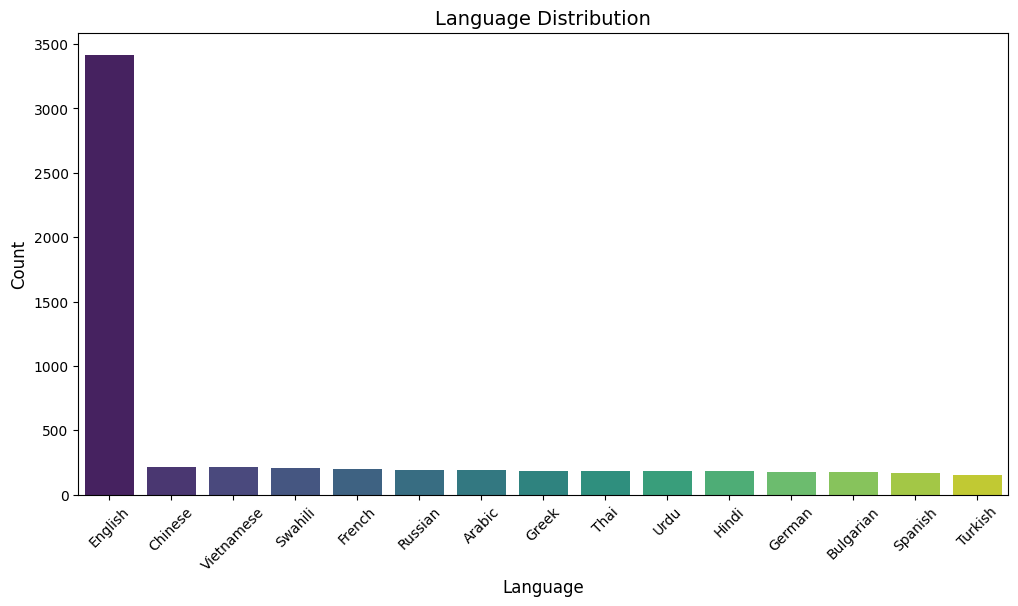

In [19]:
# Plotting the language distribution

if 'language' in trained_dataset.columns:

    language_counts = trained_dataset['language'].value_counts()

    
    plt.figure(figsize=(12, 6))
    sns.barplot(x=language_counts.index, y=language_counts.values, palette='viridis')

  
    plt.title('Language Distribution', fontsize=14)
    plt.xlabel('Language', fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.xticks(rotation=45)  # Rotate labels for better readability
    plt.show()
else:
    print("Error: 'language' column not found in train_data.")

In [20]:
!pip install textsearch
!pip install unidecode


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 11.4 MB/s eta 0:00:00


# Text pre-processing and Data Cleaning

**Removing -** 


* punctuation
* stopwords
* Removing html tags
* Removing Punctuations

**NltK Library Used**

* Performing Lemmatization
* Performing lowercase
* Removing Stopwords
* Decontracting words
* replacing special characters with their string symbols

**These, action will made our dataset more effective for our upcoming model traing process**

In [21]:

!pip install spacy nltk bs4
!python -m spacy download xx_ent_wiki_sm  # Multilingual model for stopwords


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 96.6 MB/s eta 0:00:00:00:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('xx_ent_wiki_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [22]:
!pip install langdetect langid spacy nltk requests beautifulsoup4

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 27.3 MB/s eta 0:00:0000:01
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993222 sha256=84a6957ac66904ba546bd7b215a3a9dd17f6b8ca702030102a6513208129d79d
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect


In [23]:
# Necessary tools and library importaion

import langid
import spacy
import nltk
import requests
import re
import json
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [24]:
# Download necessary NLTK data

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [25]:
# Load spaCy models for Tokenization for multilingual dataset

try:
    nlp_en = spacy.load('en_core_web_sm')  # English
except:
    print("Failed to load English spaCy model. Using basic tokenization for English.")
    nlp_en = None

try:
    nlp_multi = spacy.load('xx_ent_wiki_sm')  # Multilingual
except:
    print("Failed to load multilingual spaCy model. Using basic tokenization for non-English languages.")
    nlp_multi = None

In [26]:
# Fetching stopwords for Bangla, Hindi, and Urdu

url = "https://raw.githubusercontent.com/stopwords-iso/stopwords-iso/master/stopwords-iso.json"
response = requests.get(url)

if response.status_code == 200:
    stopwords_data = json.loads(response.text)
    stopwords_bn = set(stopwords_data.get("bn", []))  # Bangla
    stopwords_hi = set(stopwords_data.get("hi", []))  # Hindi
    stopwords_ur = set(stopwords_data.get("ur", []))  # Urdu
else:
    print("Failed to fetch stopwords:", response.status_code)
    stopwords_bn, stopwords_hi, stopwords_ur = set(), set(), set()

In [27]:
# Creating stopwords dictionary for multilanguage

nltk_stopwords_languages = stopwords.fileids()
stopwords_dict = {lang: set(stopwords.words(lang)) for lang in nltk_stopwords_languages}
stopwords_dict["bn"] = stopwords_bn
stopwords_dict["hi"] = stopwords_hi
stopwords_dict["ur"] = stopwords_ur

In [28]:
# Contractions dictionary for English

contractions_dict = {
    r"\b(can't)\b": "cannot", r"\b(won't)\b": "will not", r"\b(n't)\b": " not",
    r"\b('re)\b": " are", r"\b('s)\b": " is", r"\b('d)\b": " would",
    r"\b('ll)\b": " will", r"\b('t)\b": " not", r"\b('ve)\b": " have",
    r"\b('m)\b": " am"
}

In [29]:
# Function for decontracting words

def decontract(text):
    """Expands contractions into full words."""
    if not isinstance(text, str):  
        return ""
    
    for pattern, replacement in contractions_dict.items():
        text = re.sub(pattern, replacement, text, flags=re.IGNORECASE)
    
    return text

In [30]:
# Function to replace special characters with their word format

def replace_special_chars(text):
    replacements = {
        "&": " and ",
        "@": " at ",
        "%": " percent ",
        "$": " dollar ",
        "€": " euro ",
        "£": " pound ",
        "₹": " rupee "
    }
    for char, word in replacements.items():
        text = text.replace(char, word)
    return text

In [31]:
# Function for language detection

def detect_language(text):
    """Detect language of a given text using langid."""
    try:
        return langid.classify(text)[0]  # Returns (language_code, confidence)
    except:
        return 'unknown'


In [32]:
# Full text preprocessing function

def preprocess_text(text):
    """Preprocesses text with multilingual support."""
    if not isinstance(text, str) or text.strip() == '':
        return ''

    # 1. Remove HTML tags
    text = BeautifulSoup(text, "html.parser").get_text()

    # 2. Expand contractions
    text = decontract(text)

    # 3. Replace special characters
    text = replace_special_chars(text)

    # 4. Remove punctuation, numbers, and convert to lowercase
    text = re.sub(r'[^\w\s]', '', text.lower())

    # 5. Detect language
    lang = detect_language(text)

    # 6. Choose stopwords based on detected language
    stop_words = stopwords_dict.get(lang, set())

    # 7. Tokenization
    tokens = word_tokenize(text)

    # 8. Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]

    # 9. Lemmatization using spaCy (language-specific)
    if lang == 'en' and nlp_en:
        doc = nlp_en(" ".join(tokens))
    elif lang in ['ar', 'bn', 'hi', 'ur'] and nlp_multi:
        doc = nlp_multi(" ".join(tokens))
    else:
        # Fallback: Skip lemmatization for unsupported languages
        return " ".join(tokens)

    lemmatized_tokens = [token.lemma_ for token in doc]
    return " ".join(lemmatized_tokens)


In [33]:
# Apply preprocessing to dataset

trained_dataset['premise_cleaned'] = trained_dataset['premise'].fillna('').astype(str).apply(preprocess_text)
trained_dataset['hypothesis_cleaned'] = trained_dataset['hypothesis'].fillna('').astype(str).apply(preprocess_text)


<ipython-input-32-d59fdb0ffc4b>:9: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, "html.parser").get_text()
<ipython-input-32-d59fdb0ffc4b>:9: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, "html.parser").get_text()


In [34]:
# Displaying first few rows after cleaning

trained_dataset[['premise_cleaned', 'hypothesis_cleaned']].head(5)

,premise_cleaned,hypothesis_cleaned
0,кто она спросила его с неожиданным интересом,она спросила как это сделать так как с её точк...
1,other be zao in tohoku and a number of resort ...,there be a lot of resort in the national park
2,try to keep grass alive during a summer on a p...,there be no cost in keep the grass alive in th...
3,so I guess my experience be be just with what ...,they be able to be home rather than have to wo...
4,the journal put the point succinctly to be any...,the journal ask be this a good political move


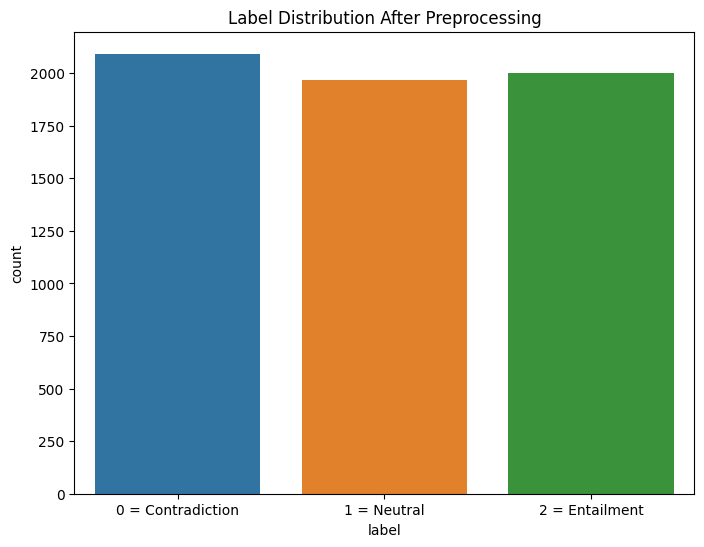

In [35]:
# Visualizing label distribution after preprocessing

plt.figure(figsize=(8, 6))
sns.countplot(x='label', data=trained_dataset)
plt.title('Label Distribution After Preprocessing')
plt.xticks(ticks=[0, 1, 2], labels=['0 = Contradiction', '1 = Neutral', '2 = Entailment'])
plt.show()

In [36]:
# Computing premise length (word count) and adding as a new feature

trained_dataset['premise_len'] = trained_dataset['premise_cleaned'].apply(lambda x: len(str(x).split()))

# Computing hypothesis length (word count) and adding as a new feature

trained_dataset['hypothesis_len'] = trained_dataset['hypothesis_cleaned'].apply(lambda x: len(str(x).split()))

# Verifying the new columns

trained_dataset.head(10)


,premise,hypothesis,lang_abv,language,label,premise_length,hypothesis_length,premise_cleaned,hypothesis_cleaned,premise_len,hypothesis_len
0,Кто? Она спросила его с неожиданным интересом.,"Она спросила, как это сделать, так как с её то...",ru,Russian,1,7,14,кто она спросила его с неожиданным интересом,она спросила как это сделать так как с её точк...,7,14
1,Others are Zao (in Tohoku) and a number of res...,There are a lot of resorts in the national park.,en,English,0,34,10,other be zao in tohoku and a number of resort ...,there be a lot of resort in the national park,34,10
2,trying to keep grass alive during a summer on ...,There was no cost in keeping the grass alive i...,en,English,2,17,13,try to keep grass alive during a summer on a p...,there be no cost in keep the grass alive in th...,17,13
3,so i guess my experience is is just with what ...,They were able to be home rather than having t...,en,English,0,31,15,so I guess my experience be be just with what ...,they be able to be home rather than have to wo...,32,15
4,The Journal put the point succinctly to Is an...,"The Journal asked ""Is this a good political mo...",en,English,1,12,9,the journal put the point succinctly to be any...,the journal ask be this a good political move,12,9
5,"Tuy nhiên, email của nhà phân tích phản ánh rằ...",Nhà phân tích đã không rõ ràng về nhiều thứ.,vi,Vietnamese,0,56,10,tuy nhiên email của nhà phân tích phản ánh rằn...,nhà phân tích đã không rõ ràng về nhiều thứ,56,10
6,"Ω, παρακαλώ. Υπήρξε πραγματική ανησυχία στη φω...",Η φωνή της έδειξε την ανησυχία της.,el,Greek,0,8,7,ω παρακαλώ υπήρξε πραγματική ανησυχία στη φωνή...,η φωνή της έδειξε την ανησυχία της,8,7
7,yeah okay yeah those games are fun to watch yo...,Those games are a lot of fun.,en,English,0,15,7,yeah okay yeah those game be fun to watch you ...,those game be a lot of fun,15,7
8,ในฐานะสมาชิกของอินเนอร์เซอร์เคิลคุณจะได้รับสิท...,สมาชิกวงใน ไม่ได้รับอะไรเลย ในฐานะที่เป็นสมาชิ...,th,Thai,2,4,3,ในฐานะสมาชกของอนเนอรเซอรเคลคณจะไดรบสทธเลอกทนงใ...,สมาชกวงใน ไมไดรบอะไรเลย ในฐานะทเปนสมาชกของกลม,4,3
9,Another White House murder mystery and a chanc...,White House murder mystery has other works bef...,en,English,0,12,10,another white house murder mystery and a chanc...,white house murder mystery have other work bef...,12,10


# Advanced Feature Extraction (NLP and Fuzzy Features)


**Used the followings -**

**Features:**

**cwc_min : Ratio of common_word_count to min lenghth of word count of Q1 and Q2**
cwc_min = common_word_count / (min(len(q1_words), len(q2_words))


**cwc_max : Ratio of common_word_count to max lenghth of word count of Q1 and Q2**
**cwc_max = common_word_count / (max(len(q1_words), len(q2_words))**


**csc_min : Ratio of common_stop_count to min lenghth of stop count of Q1 and Q2**
**csc_min = common_stop_count / (min(len(q1_stops), len(q2_stops))**


**csc_max : Ratio of common_stop_count to max lenghth of stop count of Q1 and Q2**
**csc_max = common_stop_count / (max(len(q1_stops), len(q2_stops))**


**ctc_min : Ratio of common_token_count to min lenghth of token count of Q1 and Q2**
**ctc_min = common_token_count / (min(len(q1_tokens), len(q2_tokens))**


**ctc_max : Ratio of common_token_count to max lenghth of token count of Q1 and Q2**
**ctc_max = common_token_count / (max(len(q1_tokens), len(q2_tokens))**


**last_word_eq : Check if First word of both questions is equal or not**
**last_word_eq = int(q1_tokens[-1] == q2_tokens[-1])**


**first_word_eq : Check if First word of both questions is equal or not**
**first_word_eq = int(q1_tokens[0] == q2_tokens[0])**


**abs_len_diff : Abs. length difference**
**abs_len_diff = abs(len(q1_tokens) - len(q2_tokens))**


**mean_len : Average Token Length of both Questions**
**mean_len = (len(q1_tokens) + len(q2_tokens))/2**


**fuzz_ratio : https://github.com/seatgeek/fuzzywuzzy#usage http://chairnerd.seatgeek.com/fuzzywuzzy-fuzzy-string-matching-in-python/**


**fuzz_partial_ratio : https://github.com/seatgeek/fuzzywuzzy#usage http://chairnerd.seatgeek.com/fuzzywuzzy-fuzzy-string-matching-in-python/**


**token_sort_ratio : https://github.com/seatgeek/fuzzywuzzy#usage http://chairnerd.seatgeek.com/fuzzywuzzy-fuzzy-string-matching-in-python/**


**token_set_ratio : https://github.com/seatgeek/fuzzywuzzy#usage http://chairnerd.seatgeek.com/fuzzywuzzy-fuzzy-string-matching-in-python/**


**longest_substr_ratio : Ratio of length longest common substring to min lenghth of token count of Q1 and Q2**
**longest_substr_ratio = len(longest common substring) / (min(len(q1_tokens), len(q2_tokens)**)

In [37]:
!pip install fuzzywuzzy textdistance
!pip install python-Levenshtein  # Required for fuzzywuzzy optimization

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 81.6 MB/s eta 0:00:00:00:01


In [38]:
!pip install textdistance


In [39]:
from fuzzywuzzy import fuzz

# Checking the Necessary nltk resources are downloaded 

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [40]:
# Function to clean text (multilingual)

def clean_text(text):
    
    if not isinstance(text, str):
        return ""
    # Remove special characters and extra spaces
    text = re.sub(r'\s+', ' ', text)  # Replace multiple spaces with a single space
    text = re.sub(r'[^\w\s]', '', text)  # Remove special characters
    text = text.strip()  # Remove leading/trailing spaces
    return text

In [41]:
# Function to count common words

def common_word_count(s1, s2):
    """Returns the count of common words between two sentences."""
    set1 = set(str(s1).split())
    set2 = set(str(s2).split())
    return len(set1 & set2)

# Function to find the longest common substring ratio

def longest_common_substr(s1, s2):
    """Finds the longest common substring ratio between two strings."""
    if not s1 or not s2:
        return 0
    lcs_length = textdistance.lcsseq(s1, s2)
    return len(lcs_length) / min(len(s1), len(s2)) if min(len(s1), len(s2)) > 0 else 0

# Function to compute word share ratio

def word_share_ratio(s1, s2):
    """Computes ratio of common words to total words."""
    set1 = set(str(s1).split())
    set2 = set(str(s2).split())
    return len(set1 & set2) / (len(set1 | set2) + 1e-9)

In [42]:
# Function to get stopwords based on detected language

def get_stopwords(text):
    """Detect language and return appropriate stopwords set."""
    try:
        lang = detect(text)  # Detect the language
        return set(stopwords.words(lang)) if lang in stopwords.fileids() else set()
    except:
        return set()

In [43]:
# Define function for advanced NLP and fuzzy features

def advanced_features(row):
    
    """Computing advanced NLP and fuzzy similarity features."""
    
    # Clean the premise and hypothesis
    premise_cleaned = clean_text(row['premise'])
    hypothesis_cleaned = clean_text(row['hypothesis'])

    # Tokenize premise and hypothesis
    q1_tokens = word_tokenize(premise_cleaned)  # Tokenize premise
    q2_tokens = word_tokenize(hypothesis_cleaned)  # Tokenize hypothesis

    # Get stopwords based on detected language
    stopwords_q1 = get_stopwords(premise_cleaned)
    stopwords_q2 = get_stopwords(hypothesis_cleaned)

    # Remove stopwords
    q1_words = [word for word in q1_tokens if word not in stopwords_q1]
    q2_words = [word for word in q2_tokens if word not in stopwords_q2]

    # Compute common words and stopwords
    common_words = set(q1_words) & set(q2_words)
    common_stops = set(q1_tokens) & set(q2_tokens) & stopwords_q1 & stopwords_q2
    common_tokens = set(q1_tokens) & set(q2_tokens)

    # Compute ratios
    cwc_min = len(common_words) / min(len(q1_words), len(q2_words)) if min(len(q1_words), len(q2_words)) > 0 else 0
    cwc_max = len(common_words) / max(len(q1_words), len(q2_words)) if max(len(q1_words), len(q2_words)) > 0 else 0

    csc_min = len(common_stops) / min(len(q1_tokens), len(q2_tokens)) if min(len(q1_tokens), len(q2_tokens)) > 0 else 0
    csc_max = len(common_stops) / max(len(q1_tokens), len(q2_tokens)) if max(len(q1_tokens), len(q2_tokens)) > 0 else 0

    ctc_min = len(common_tokens) / min(len(q1_tokens), len(q2_tokens)) if min(len(q1_tokens), len(q2_tokens)) > 0 else 0
    ctc_max = len(common_tokens) / max(len(q1_tokens), len(q2_tokens)) if max(len(q1_tokens), len(q2_tokens)) > 0 else 0

    first_word_eq = int(q1_tokens[0] == q2_tokens[0]) if q1_tokens and q2_tokens else 0
    last_word_eq = int(q1_tokens[-1] == q2_tokens[-1]) if q1_tokens and q2_tokens else 0

    abs_len_diff = abs(len(q1_tokens) - len(q2_tokens))
    mean_len = (len(q1_tokens) + len(q2_tokens)) / 2

    fuzz_ratio = fuzz.ratio(premise_cleaned, hypothesis_cleaned)
    fuzz_partial_ratio = fuzz.partial_ratio(premise_cleaned, hypothesis_cleaned)
    token_sort_ratio = fuzz.token_sort_ratio(premise_cleaned, hypothesis_cleaned)
    token_set_ratio = fuzz.token_set_ratio(premise_cleaned, hypothesis_cleaned)

    # Compute Longest Common words
    common_word_counts = common_word_count(premise_cleaned, hypothesis_cleaned)

    # Compute longest common substring ratio
    longest_substr_ratio = longest_common_substr(premise_cleaned, hypothesis_cleaned)

    # Compute word share ratio
    word_share = word_share_ratio(premise_cleaned, hypothesis_cleaned)

    return [
        cwc_min, cwc_max, csc_min, csc_max, ctc_min, ctc_max,
        first_word_eq, last_word_eq, abs_len_diff, mean_len,
        fuzz_ratio, fuzz_partial_ratio, token_sort_ratio, token_set_ratio,
        common_word_counts, longest_substr_ratio, word_share
    ]

# Apply function to dataset

featured_columns = [
    'cwc_min', 'cwc_max', 'csc_min', 'csc_max', 
    'ctc_min', 'ctc_max', 'first_word_eq', 'last_word_eq',
    'abs_len_diff', 'mean_len', 'fuzz_ratio', 
    'fuzz_partial_ratio', 'token_sort_ratio', 
    'token_set_ratio', 'common_word_counts', 
    'longest_substr_ratio', 'word_share'
]



In [44]:
import textdistance

# Adding new features into the dataset

trained_dataset[featured_columns] = trained_dataset.apply(advanced_features, axis=1, result_type="expand")

In [45]:
trained_dataset.head(5)

,premise,hypothesis,lang_abv,language,label,premise_length,hypothesis_length,premise_cleaned,hypothesis_cleaned,premise_len,...,last_word_eq,abs_len_diff,mean_len,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,token_set_ratio,common_word_counts,longest_substr_ratio,word_share
0,Кто? Она спросила его с неожиданным интересом.,"Она спросила, как это сделать, так как с её то...",ru,Russian,1,7,14,кто она спросила его с неожиданным интересом,она спросила как это сделать так как с её точк...,7,...,0.0,7.0,10.5,42.0,50.0,49.0,52.0,3.0,0.590909,0.187500
1,Others are Zao (in Tohoku) and a number of res...,There are a lot of resorts in the national park.,en,English,0,34,10,other be zao in tohoku and a number of resort ...,there be a lot of resort in the national park,34,...,0.0,24.0,22.0,35.0,68.0,39.0,96.0,6.0,0.893617,0.181818
2,trying to keep grass alive during a summer on ...,There was no cost in keeping the grass alive i...,en,English,2,17,13,try to keep grass alive during a summer on a p...,there be no cost in keep the grass alive in th...,17,...,0.0,4.0,15.0,48.0,56.0,56.0,59.0,4.0,0.571429,0.173913
3,so i guess my experience is is just with what ...,They were able to be home rather than having t...,en,English,0,31,15,so I guess my experience be be just with what ...,they be able to be home rather than have to wo...,32,...,0.0,16.0,23.0,37.0,47.0,52.0,65.0,7.0,0.538462,0.205882
4,The Journal put the point succinctly to Is an...,"The Journal asked ""Is this a good political mo...",en,English,1,12,9,the journal put the point succinctly to be any...,the journal ask be this a good political move,12,...,0.0,3.0,10.5,51.0,53.0,58.0,63.0,4.0,0.638298,0.250000


In [46]:
# Check correlation between common_words and label

print(trained_dataset.groupby('label')['common_word_counts'].describe())

        count      mean       std  min  25%  50%  75%   max
label                                                      
0      2092.0  4.106119  3.325225  0.0  2.0  4.0  6.0  25.0
1      1969.0  2.878619  2.682371  0.0  1.0  2.0  4.0  25.0
2      1999.0  3.041521  2.665686  0.0  1.0  3.0  4.0  19.0


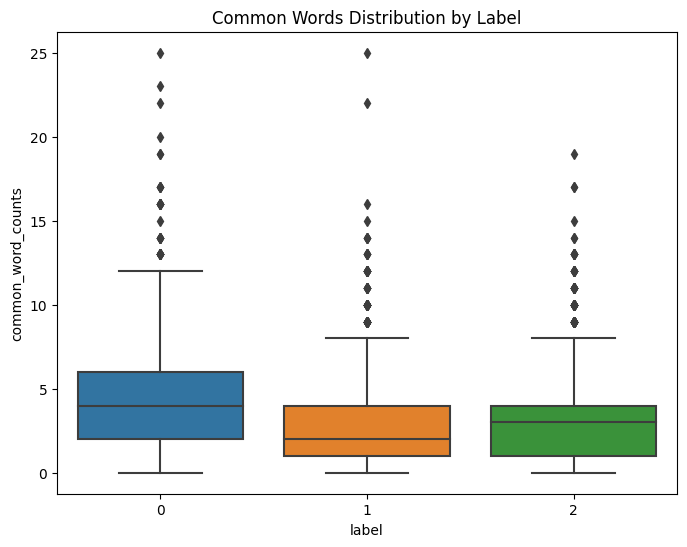

In [47]:
# Visualizing the distribution of common_words for each label using bloxplot

plt.figure(figsize=(8,6))
sns.boxplot(x='label', y='common_word_counts', data=trained_dataset)
plt.title('Common Words Distribution by Label')
plt.show()

In [48]:
# Using TF-IDF vectorization(for turning the text into numeric values) and Cosine similarity 

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [49]:
# TF-IDF Feature Extraction
tfidf_vectorizer = TfidfVectorizer()
tfidf_premise = tfidf_vectorizer.fit_transform(trained_dataset['premise_cleaned'])
tfidf_hypothesis = tfidf_vectorizer.transform(trained_dataset['hypothesis_cleaned'])


In [50]:
# Compute Cosine Similarity
cosine_sim = cosine_similarity(tfidf_premise, tfidf_hypothesis)

# Since cosine_similarity returns a matrix, extract the diagonal (pairwise similarity)
pairwise_cosine_sim = cosine_sim.diagonal()

# Add Cosine Similarity as a new feature to the dataset
trained_dataset['cosine_similarity'] = pairwise_cosine_sim

# Check the updated dataset
trained_dataset[['premise_cleaned', 'hypothesis_cleaned', 'cosine_similarity']].head()

,premise_cleaned,hypothesis_cleaned,cosine_similarity
0,кто она спросила его с неожиданным интересом,она спросила как это сделать так как с её точк...,0.258160
1,other be zao in tohoku and a number of resort ...,there be a lot of resort in the national park,0.393828
2,try to keep grass alive during a summer on a p...,there be no cost in keep the grass alive in th...,0.504298
3,so I guess my experience be be just with what ...,they be able to be home rather than have to wo...,0.418569
4,the journal put the point succinctly to be any...,the journal ask be this a good political move,0.267643


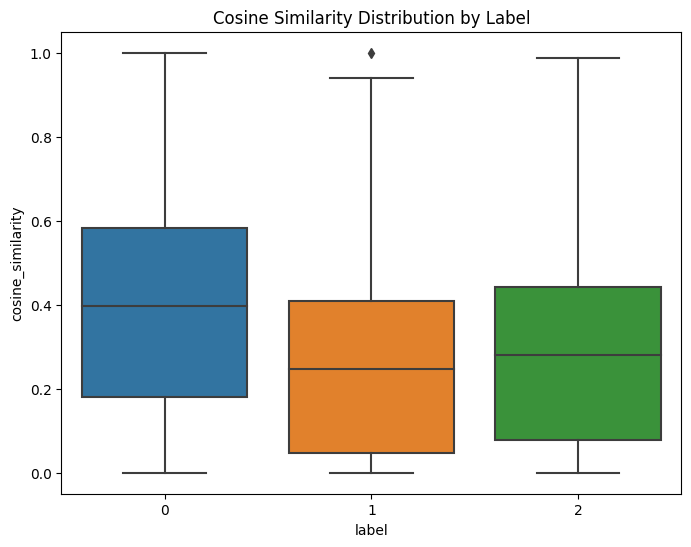

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.boxplot(x='label', y='cosine_similarity', data=trained_dataset)
plt.title('Cosine Similarity Distribution by Label')
plt.show()

In [52]:
trained_dataset = trained_dataset.dropna().reset_index(drop=True)

# Model Training 

In [53]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Using Baseline ML Model (Logistic Regression, Random Forest, Decision trees, XGB)

In [54]:

# Use the feature indataset for training
X = trained_dataset[featured_columns]
y = trained_dataset['label']

In [55]:
# Split data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [56]:
# Define parameter grids for GridSearchCV
param_grid_rf = {
    'n_estimators': [50, 100, 200], 
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

param_grid_lr = {
    'C': [0.01, 0.1, 1, 10], 
    'solver': ['lbfgs', 'liblinear']
}

param_grid_dt = {
    'max_depth': [None, 10, 20], 
    'min_samples_split': [2, 5, 10]
}


# Using Grid SearchCV for mapping the Best Parameter for the baseline models

In [57]:
# Performing GridSearchCV for each model
rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)
lr = GridSearchCV(LogisticRegression(random_state=42, max_iter=2000), param_grid_lr, cv=5, scoring='accuracy', n_jobs=-1)
dt = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid_dt, cv=5, scoring='accuracy', n_jobs=-1)

# Train models
rf.fit(X_train, y_train)
lr.fit(X_train, y_train)
dt.fit(X_train, y_train)

# Get the best models from GridSearch
best_rf = rf.best_estimator_
best_lr = lr.best_estimator_
best_dt = dt.best_estimator_

In [58]:
# Predict on test data
y_pred_rf = best_rf.predict(X_test)
y_pred_lr = best_lr.predict(X_test)
y_pred_dt = best_dt.predict(X_test)


In [59]:
# Evaluate models
def evaluate_model(y_true, y_pred, model_name):
    print(f"\n🔹 Model: {model_name}")
    print("Accuracy:", accuracy_score(y_true, y_pred) * 100 )
    print("Classification Report:\n", classification_report(y_true, y_pred))
    
    # Plot Confusion Matrix
    plt.figure(figsize=(5, 4))
    sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, fmt='d', cmap="Blues", xticklabels=['Neutral', 'Contradiction', 'Entailment'], yticklabels=['Neutral', 'Contradiction', 'Entailment'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()


🔹 Model: Random Forest
Accuracy: 43.89438943894389
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.52      0.51       418
           1       0.43      0.55      0.48       394
           2       0.35      0.24      0.29       400

    accuracy                           0.44      1212
   macro avg       0.43      0.44      0.43      1212
weighted avg       0.43      0.44      0.43      1212



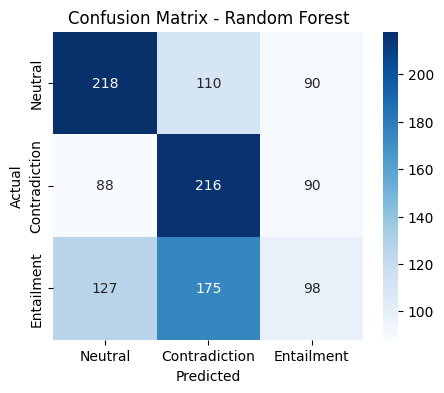


🔹 Model: Logistic Regression
Accuracy: 43.646864686468646
Classification Report:
               precision    recall  f1-score   support

           0       0.47      0.57      0.52       418
           1       0.44      0.53      0.48       394
           2       0.36      0.20      0.26       400

    accuracy                           0.44      1212
   macro avg       0.42      0.43      0.42      1212
weighted avg       0.42      0.44      0.42      1212



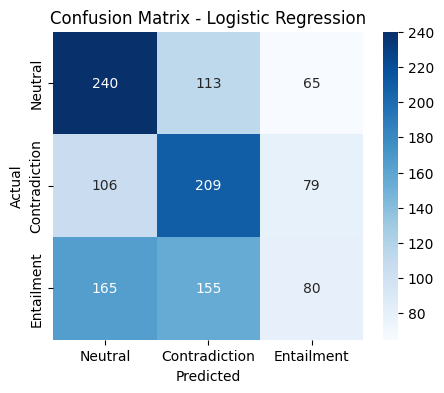


🔹 Model: Decision Tree
Accuracy: 41.006600660066006
Classification Report:
               precision    recall  f1-score   support

           0       0.46      0.51      0.48       418
           1       0.42      0.50      0.46       394
           2       0.32      0.22      0.26       400

    accuracy                           0.41      1212
   macro avg       0.40      0.41      0.40      1212
weighted avg       0.40      0.41      0.40      1212



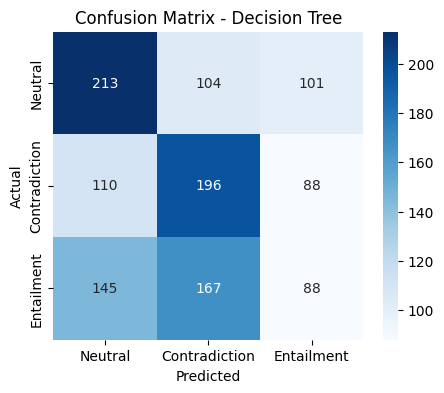

In [60]:
# Display model evaluations
evaluate_model(y_test, y_pred_rf, "Random Forest")
evaluate_model(y_test, y_pred_lr, "Logistic Regression")
evaluate_model(y_test, y_pred_dt, "Decision Tree")

In [61]:
import xgboost as xgb
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [62]:
# Training XG Boost model with GridSearch CV

param_grid_xgb = {
    'n_estimators': [50, 100, 200], 
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.2]
}

xgb_model = GridSearchCV(xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42), 
                         param_grid_xgb, cv=5, scoring='accuracy', n_jobs=-1)

# Train XGBoost
xgb_model.fit(X_train, y_train)

# Get the best XGBoost model
best_xgb = xgb_model.best_estimator_

# Predict using XGBoost
y_pred_xgb = best_xgb.predict(X_test)

In [63]:
import numpy as np

# Training Custom ANN model

num_classes = len(set(y))  # Find number of unique labels

# Build ANN Model
ann_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(num_classes, activation='softmax')  # Softmax for multi-class classification
])

# Compile the ANN model
ann_model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the ANN model
history = ann_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Predict using ANN
y_pred_ann = ann_model.predict(X_test)
y_pred_ann_classes = np.argmax(y_pred_ann, axis=1)  


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
152/152 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - accuracy: 0.3371 - loss: 5.3633 - val_accuracy: 0.3457 - val_loss: 1.0957
Epoch 2/50
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3476 - loss: 1.1550 - val_accuracy: 0.3300 - val_loss: 1.0990
Epoch 3/50
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3506 - loss: 1.1170 - val_accuracy: 0.3787 - val_loss: 1.0957
Epoch 4/50
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3511 - loss: 1.1091 - val_accuracy: 0.3787 - val_loss: 1.0957
Epoch 5/50
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3598 - loss: 1.0957 - val_accuracy: 0.4109 - val_loss: 1.0949
Epoch 6/50
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3605 - loss: 1.1002 - val_accuracy: 0.4183 - val_loss: 1.0907
Epoch 7/50
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3495 - loss: 1.1004 - val_accuracy: 0.4117 - val_loss: 1.0899
Epoch 8/50
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3657 - loss: 1.0951 - val_accuracy: 0


 Model: XGBoost
Accuracy: 0.429042904290429
Classification Report:
               precision    recall  f1-score   support

           0       0.47      0.54      0.50       418
           1       0.43      0.58      0.49       394
           2       0.34      0.16      0.22       400

    accuracy                           0.43      1212
   macro avg       0.41      0.43      0.40      1212
weighted avg       0.41      0.43      0.41      1212



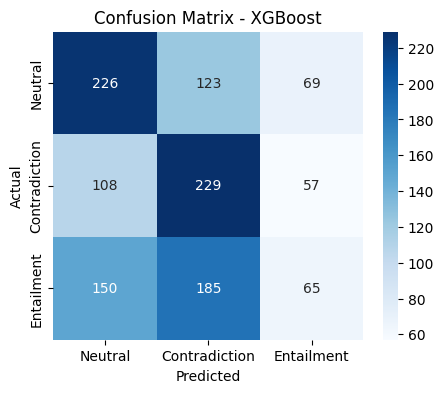


 Model: Artificial Neural Network (ANN)
Accuracy: 0.43234323432343236
Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.38      0.45       418
           1       0.41      0.71      0.52       394
           2       0.34      0.22      0.26       400

    accuracy                           0.43      1212
   macro avg       0.44      0.43      0.41      1212
weighted avg       0.44      0.43      0.41      1212



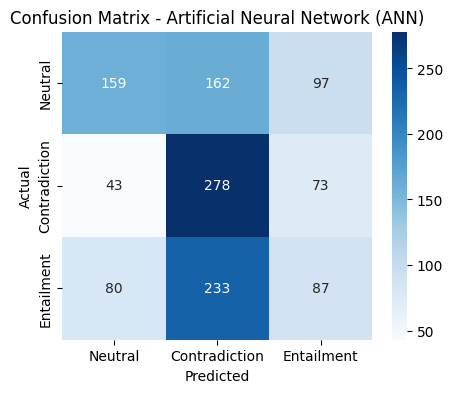

In [64]:
def evaluate_model(y_true, y_pred, model_name):
    print(f"\n Model: {model_name}")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Classification Report:\n", classification_report(y_true, y_pred))
    
    # Plot Confusion Matrix
    plt.figure(figsize=(5, 4))
    sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, fmt='d', cmap="Blues", 
                xticklabels=['Neutral', 'Contradiction', 'Entailment'], 
                yticklabels=['Neutral', 'Contradiction', 'Entailment'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()

# Evaluate the new models
evaluate_model(y_test, y_pred_xgb, "XGBoost")
evaluate_model(y_test, y_pred_ann_classes, "Artificial Neural Network (ANN)")

In [65]:
# Now, Summarizing the Custom ANN and XG-Boost model

models = ["Random Forest", "Logistic Regression", "Decision Tree", "XGBoost", "ANN"]
accuracies = [
    accuracy_score(y_test, y_pred_rf),
    accuracy_score(y_test, y_pred_lr),
    accuracy_score(y_test, y_pred_dt),
    accuracy_score(y_test, y_pred_xgb),
    accuracy_score(y_test, y_pred_ann_classes)
]

summary_df = pd.DataFrame({"Model": models, "Accuracy": accuracies})
summary_df.sort_values(by="Accuracy", ascending=False, inplace=True)
print("\n Model Performance Summary:\n", summary_df)


 Model Performance Summary:
                  Model  Accuracy
0        Random Forest  0.438944
1  Logistic Regression  0.436469
4                  ANN  0.432343
3              XGBoost  0.429043
2        Decision Tree  0.410066


# Summary of The Base Line model Performance -

The performance of traditional models on the multilingual NLI task was limited due to their reliance on hand-engineered features rather than deep semantic understanding. 

Random Forest (43.89%) performed the best due to its ensemble nature, effectively capturing lexical similarities while reducing overfitting. Logistic Regression (43.64%) followed closely, benefiting from linear relationships in the features.

ANN (43.23%) had potential but lacked pre-trained embeddings to truly understand sentence semantics.
XGBoost (42.90%) was feature-sensitive and slightly overfit the data,

while Decision Tree (41.00%) struggled the most due to high variance and weak generalization. 

Overall, the models lacked deep contextual understanding, and significant accuracy improvements could be achieved by replacing feature engineering with pretrained BERT/XLM-R embeddings and fine-tuning them for sentence-pair classification.

In [66]:

import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight


# Training The LSTM model

In [67]:
from tensorflow.keras.layers import LSTM, Embedding

lstm_model = Sequential([
    Embedding(input_dim=5000, output_dim=128, input_length=X_train.shape[1]),
    LSTM(64, return_sequences=True),
    LSTM(32),
    Dense(1, activation='sigmoid')
])

lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
lstm_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


152/152 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.3247 - loss: 0.1999 - val_accuracy: 0.3251 - val_loss: 0.0522
Epoch 2/50
152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.3424 - loss: 0.0148 - val_accuracy: 0.3251 - val_loss: -0.2880
Epoch 3/50
152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.3291 - loss: -0.3104 - val_accuracy: 0.3251 - val_loss: -0.4736
Epoch 4/50
152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.3178 - loss: -0.7415 - val_accuracy: 0.3251 - val_loss: -0.6635
Epoch 5/50
152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.3227 - loss: -0.9404 - val_accuracy: 0.3251 - val_loss: -0.8056
Epoch 6/50
152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.3217 - loss: -1.2806 - val_accuracy: 0.3251 - val_loss: -1.1099
Epoch 7/50
152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.3312 - loss: -1.7488 - val_accuracy: 0.3251 - val_loss: -1.2790
Epoch 8/50
152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.3260 - loss: -2.0495 - val_accuracy: 0

In [68]:
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Evaluate model on test data
y_pred_probs = lstm_model.predict(X_test)  # Get predicted probabilities
y_pred = (y_pred_probs > 0.5).astype(int)  # Convert to binary predictions

# Compute accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {accuracy:.4f}")


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Accuracy Score: 0.3375


In [69]:
from collections import Counter
print(Counter(y_train))  # Check training set distribution
print(Counter(y_test))   # Check test set distribution

Counter({0: 1674, 2: 1599, 1: 1575})
Counter({0: 418, 2: 400, 1: 394})


# BERT and XML-R Model Deep Learning Model Training


In [70]:
from torch.utils.data import Dataset, DataLoader
from transformers import BertTokenizer, XLMRobertaTokenizer, BertForSequenceClassification, XLMRobertaForSequenceClassification
from transformers import AdamW, get_scheduler
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from tqdm import tqdm
from sklearn.model_selection import train_test_split
import torch
import torch.optim as optim
import torch.nn as nn

In [71]:

# Check for GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [79]:
df = trained_dataset.copy()
labels = df['label'].values

In [80]:
# Split dataset (80% Train, 20% Test)
train_texts, test_texts, train_labels, test_labels = train_test_split(
    list(zip(df['premise_cleaned'], df['hypothesis_cleaned'])),
    labels,
    test_size=0.2,
    random_state=42,
    stratify=labels
)

In [81]:
# Tokenization Function
def tokenize_data(model_name, texts):
    if model_name == "bert":
        tokenizer = BertTokenizer.from_pretrained("bert-base-multilingual-cased")
    else:
        tokenizer = XLMRobertaTokenizer.from_pretrained("xlm-roberta-base")
    
    encodings = tokenizer(
        [t[0] for t in texts], [t[1] for t in texts],
        truncation=True,
        padding="max_length",
        max_length=256,
        return_tensors="pt"
    )
    return encodings

In [82]:
# Dataset Class
class NliDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = torch.tensor(labels, dtype=torch.long)

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        item = {key: val[idx] for key, val in self.encodings.items()}
        item["labels"] = self.labels[idx]
        return item


In [83]:
# Train Function (Runs Separately for BERT & XLM-R)
def train_and_evaluate(model_name, num_epochs=5, batch_size=16):
    print(f"\nTraining {model_name.upper()}...\n")

    # Load tokenizer and model
    if model_name == "bert":
        tokenizer = BertTokenizer.from_pretrained("bert-base-multilingual-cased")
        model = BertForSequenceClassification.from_pretrained("bert-base-multilingual-cased", num_labels=3).to(device)
    else:
        tokenizer = XLMRobertaTokenizer.from_pretrained("xlm-roberta-base")
        model = XLMRobertaForSequenceClassification.from_pretrained("xlm-roberta-base", num_labels=3).to(device)

    # Tokenize dataset
    train_encodings = tokenize_data(model_name, train_texts)
    test_encodings = tokenize_data(model_name, test_texts)

    # Create datasets and dataloaders
    train_dataset = NliDataset(train_encodings, train_labels)
    test_dataset = NliDataset(test_encodings, test_labels)
    
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

    # Optimizer & Scheduler
    optimizer = AdamW(model.parameters(), lr=2e-5)
    num_training_steps = len(train_loader) * num_epochs
    scheduler = get_scheduler("linear", optimizer=optimizer, num_warmup_steps=0, num_training_steps=num_training_steps)

    # Loss Function
    loss_fn = torch.nn.CrossEntropyLoss()

    best_f1 = 0  # Track best model

    for epoch in range(num_epochs):
        model.train()
        total_loss, all_preds, all_labels = 0, [], []

        for batch in tqdm(train_loader, desc=f"Training Epoch {epoch+1}/{num_epochs}"):
            optimizer.zero_grad()
            
            batch = {k: v.to(device) for k, v in batch.items()}
            outputs = model(**batch)
            loss = outputs.loss
            logits = outputs.logits
            
            loss.backward()
            optimizer.step()
            scheduler.step()
            
            total_loss += loss.item()
            preds = torch.argmax(logits, dim=-1).cpu().numpy()
            labels = batch["labels"].cpu().numpy()
            
            all_preds.extend(preds)
            all_labels.extend(labels)

        # Training Metrics
        train_acc = accuracy_score(all_labels, all_preds)
        train_f1 = f1_score(all_labels, all_preds, average='macro')

        # Evaluation
        model.eval()
        all_preds, all_labels = [], []
        with torch.no_grad():
            for batch in test_loader:
                batch = {k: v.to(device) for k, v in batch.items()}
                outputs = model(**batch)
                preds = torch.argmax(outputs.logits, dim=-1).cpu().numpy()
                labels = batch["labels"].cpu().numpy()
                
                all_preds.extend(preds)
                all_labels.extend(labels)

        test_acc = accuracy_score(all_labels, all_preds)
        test_f1 = f1_score(all_labels, all_preds, average='macro')

        print(f"Epoch {epoch+1}: Train Loss: {total_loss:.4f}, Train Acc: {train_acc:.4f}, Train F1: {train_f1:.4f}")
        print(f"Epoch {epoch+1}: Test Acc: {test_acc:.4f}, Test F1: {test_f1:.4f}")

        # Save best model
        if test_f1 > best_f1:
            best_f1 = test_f1
            torch.save(model.state_dict(), f"best_model_{model_name}.pt")
            print(f"Best model saved: best_model_{model_name}.pt")

    # Confusion Matrix & Classification Report
    cm = confusion_matrix(all_labels, all_preds)
    print("\n🔹 Classification Report:\n", classification_report(all_labels, all_preds))

    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Entailment", "Neutral", "Contradiction"], yticklabels=["Entailment", "Neutral", "Contradiction"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {model_name.upper()}")
    plt.show()

    return model


Training BERT...



tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/714M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
Training Epoch 1/5: 100%|██████████| 303/303 [01:58<00:00,  2.55it/s]


Epoch 1: Train Loss: 308.5026, Train Acc: 0.4643, Train F1: 0.4595
Epoch 1: Test Acc: 0.5825, Test F1: 0.5792
Best model saved: best_model_bert.pt


Training Epoch 2/5: 100%|██████████| 303/303 [01:59<00:00,  2.54it/s]


Epoch 2: Train Loss: 242.8583, Train Acc: 0.6328, Train F1: 0.6303
Epoch 2: Test Acc: 0.6163, Test F1: 0.6150
Best model saved: best_model_bert.pt


Training Epoch 3/5: 100%|██████████| 303/303 [01:59<00:00,  2.54it/s]


Epoch 3: Train Loss: 177.3878, Train Acc: 0.7434, Train F1: 0.7430
Epoch 3: Test Acc: 0.6172, Test F1: 0.6184
Best model saved: best_model_bert.pt


Training Epoch 4/5: 100%|██████████| 303/303 [01:59<00:00,  2.54it/s]


Epoch 4: Train Loss: 121.4698, Train Acc: 0.8276, Train F1: 0.8268
Epoch 4: Test Acc: 0.6023, Test F1: 0.6034


Training Epoch 5/5: 100%|██████████| 303/303 [01:59<00:00,  2.54it/s]


Epoch 5: Train Loss: 85.5618, Train Acc: 0.8795, Train F1: 0.8801
Epoch 5: Test Acc: 0.6064, Test F1: 0.6074

🔹 Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.56      0.62       418
           1       0.65      0.57      0.60       394
           2       0.52      0.69      0.59       400

    accuracy                           0.61      1212
   macro avg       0.62      0.61      0.61      1212
weighted avg       0.62      0.61      0.61      1212



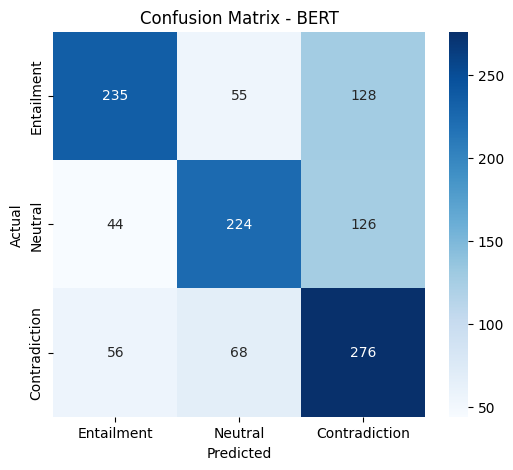

In [84]:
# Running BERT model
bert_model = train_and_evaluate("bert", num_epochs=5, batch_size=16)


Training XLM-R...



tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.10M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/615 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.12G [00:00<?, ?B/s]

Some weights of XLMRobertaForSequenceClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
Training Epoch 1/5: 100%|██████████| 303/303 [02:03<00:00,  2.45it/s]


Epoch 1: Train Loss: 333.6090, Train Acc: 0.3340, Train F1: 0.3204
Epoch 1: Test Acc: 0.3663, Test F1: 0.2763
Best model saved: best_model_xlm-r.pt


Training Epoch 2/5: 100%|██████████| 303/303 [02:03<00:00,  2.45it/s]


Epoch 2: Train Loss: 332.6947, Train Acc: 0.3548, Train F1: 0.3449
Epoch 2: Test Acc: 0.3457, Test F1: 0.1728


Training Epoch 3/5: 100%|██████████| 303/303 [02:03<00:00,  2.44it/s]


Epoch 3: Train Loss: 320.5933, Train Acc: 0.4307, Train F1: 0.4276
Epoch 3: Test Acc: 0.5545, Test F1: 0.5546
Best model saved: best_model_xlm-r.pt


Training Epoch 4/5: 100%|██████████| 303/303 [02:03<00:00,  2.45it/s]


Epoch 4: Train Loss: 275.9055, Train Acc: 0.5771, Train F1: 0.5764
Epoch 4: Test Acc: 0.6180, Test F1: 0.6183
Best model saved: best_model_xlm-r.pt


Training Epoch 5/5: 100%|██████████| 303/303 [02:03<00:00,  2.45it/s]


Epoch 5: Train Loss: 235.7854, Train Acc: 0.6599, Train F1: 0.6595
Epoch 5: Test Acc: 0.6328, Test F1: 0.6345
Best model saved: best_model_xlm-r.pt

🔹 Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.62      0.65       418
           1       0.54      0.66      0.59       394
           2       0.70      0.62      0.66       400

    accuracy                           0.63      1212
   macro avg       0.64      0.63      0.63      1212
weighted avg       0.64      0.63      0.63      1212



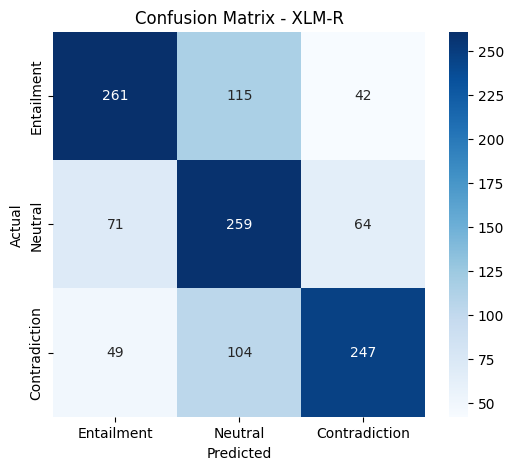

In [85]:
# Running XML-R model
xlmr_model = train_and_evaluate("xlm-r", num_epochs=5, batch_size=16)

In [86]:
def predict_nli(model_name, premise, hypothesis):
    label_map = {0: "Contradiction", 1: "Neutral", 2: "Entailment"}
    
    # Load tokenizer and model
    if model_name == "bert":
        tokenizer = BertTokenizer.from_pretrained("bert-base-multilingual-cased")
        model = BertForSequenceClassification.from_pretrained("bert-base-multilingual-cased", num_labels=3)
    else:
        tokenizer = XLMRobertaTokenizer.from_pretrained("xlm-roberta-base")
        model = XLMRobertaForSequenceClassification.from_pretrained("xlm-roberta-base", num_labels=3)
    
    # Load the best model checkpoint
    model.load_state_dict(torch.load(f"best_model_{model_name}.pt", map_location=device))
    model.to(device)
    model.eval()
    
    # Tokenize input
    encoding = tokenizer(
        premise, hypothesis,
        truncation=True,
        padding="max_length",
        max_length=128,
        return_tensors="pt"
    )
    
    # Move inputs to device
    input_data = {key: val.to(device) for key, val in encoding.items()}
    
    # Get predictions
    with torch.no_grad():
        outputs = model(**input_data)
        logits = outputs.logits
        prediction = torch.argmax(logits, dim=-1).item()
    
    print(f"{model_name.upper()} Prediction: {label_map[prediction]} (Label {prediction})")
    return label_map[prediction]


In [92]:
# Prediction using bothe BERT and XML-R

premise = "Через каждые сто градусов пятна краски меняют свой цвет, она может быть красной и изменить цвет на синий."
hypothesis = "Краска изменяется в соответствии с цветом."

print("\n--- BERT Model Prediction ---")
predict_nli("bert", premise, hypothesis)

print("\n--- XLM-R Model Prediction ---")
predict_nli("xlm-r", premise, hypothesis)


--- BERT Model Prediction ---


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
<ipython-input-86-53836f01c5db>:13: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globa

BERT Prediction: Contradiction (Label 0)

--- XLM-R Model Prediction ---


Some weights of XLMRobertaForSequenceClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


XLM-R Prediction: Contradiction (Label 0)


'Contradiction'